### Naive Bayes

In [4]:
from sklearn import datasets

In [5]:
iris = datasets.load_iris()

In [6]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [7]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [8]:
iris.data.shape

(150, 4)

In [9]:
iris.target.shape

(150,)

In [10]:
iris.data[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [11]:
iris.target[:5,]

array([0, 0, 0, 0, 0])

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test =  train_test_split(iris.data,
                                                    iris.target,
                                                    test_size=0.3)

In [14]:
X_train.shape

(105, 4)

In [15]:
X_test.shape

(45, 4)

In [16]:
from sklearn.naive_bayes import GaussianNB

In [17]:
gnb = GaussianNB()

In [18]:
gnb.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [19]:
y_pred = gnb.predict(X_test)

In [20]:
y_pred

array([1, 1, 1, 0, 1, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 2, 2, 2, 1, 0,
       0, 0, 2, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 2, 1, 1, 2, 0,
       2])

In [21]:
y_test

array([1, 1, 1, 0, 1, 2, 2, 2, 2, 1, 2, 0, 0, 0, 0, 1, 0, 2, 2, 2, 2, 0,
       0, 0, 2, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 2, 1, 0, 2, 1, 1, 2, 0,
       2])

In [22]:
from sklearn.metrics import accuracy_score

In [23]:
accuracy_score(y_test, y_pred)

0.9333333333333333

### Decision Trees

In [24]:
from sklearn.tree import DecisionTreeClassifier

In [25]:
dt = DecisionTreeClassifier()

In [26]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [27]:
y_pred = dt.predict(X_test)

In [28]:
accuracy_score(y_test, y_pred)

0.9333333333333333

In [29]:
import graphviz
from sklearn.tree import export_graphviz

In [30]:
dot_data = export_graphviz(dt, out_file=None,
                          feature_names = iris.feature_names,
                          class_names = iris.target_names)

In [31]:
graph = graphviz.Source(dot_data)

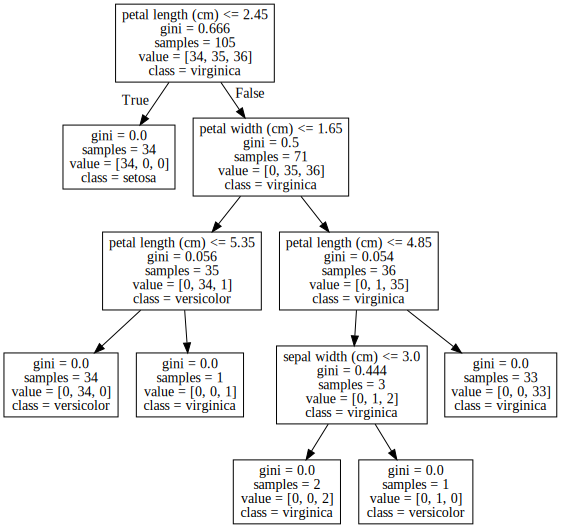

In [32]:
graph

### k_Nearest Neighbors

In [33]:
from sklearn.neighbors import KNeighborsClassifier

In [34]:
neigh = KNeighborsClassifier(n_neighbors=5, 
                             metric='minkowski', p=2) #1==manhattan, 2==euclidian

In [35]:
neigh.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [36]:
accuracy_score(y_test, neigh.predict(X_test))

0.9555555555555556

### Support Vector Machines

In [37]:
from sklearn.svm import SVC

In [38]:
svc = SVC(kernel='linear')

In [39]:
svc.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [40]:
y_pred = svc.predict(X_test)

In [41]:
accuracy_score(y_test, y_pred) #자리 상관x

1.0

In [66]:
x_min, x_max = iris.data[:,0].min()-1, iris.data[:,0].max()+1
y_min, y_max = iris.data[:,1].min()-1, iris.data[:,1].max()+1

In [45]:
svc_linear = SVC(kernel="linear").fit(iris.data[:,0:2], iris.target)
svc_poly = SVC(kernel="poly").fit(iris.data[:, 0:2], iris.target)
svc_rbf = SVC(kernel="rbf").fit(iris.data[:,0:2], iris.target)

/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


### Before Visualization

In [47]:
import numpy as np
x = np.arange(0,1, 0.1)
y = np.arange(0,1, 0.2)

In [48]:
x

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

In [49]:
y

array([0. , 0.2, 0.4, 0.6, 0.8])

In [50]:
xx, yy = np.meshgrid(x, y)

In [51]:
xx

array([[0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
       [0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
       [0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
       [0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
       [0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]])

In [52]:
yy

array([[0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2],
       [0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4],
       [0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6],
       [0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8]])

In [53]:
xx.ravel() #하나의 vector로 바꿈

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0. , 0.1, 0.2,
       0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0. , 0.1, 0.2, 0.3, 0.4, 0.5,
       0.6, 0.7, 0.8, 0.9, 0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,
       0.9, 0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

In [54]:
cxy = np.c_[xx.ravel(), yy.ravel()]

In [55]:
cxy

array([[0. , 0. ],
       [0.1, 0. ],
       [0.2, 0. ],
       [0.3, 0. ],
       [0.4, 0. ],
       [0.5, 0. ],
       [0.6, 0. ],
       [0.7, 0. ],
       [0.8, 0. ],
       [0.9, 0. ],
       [0. , 0.2],
       [0.1, 0.2],
       [0.2, 0.2],
       [0.3, 0.2],
       [0.4, 0.2],
       [0.5, 0.2],
       [0.6, 0.2],
       [0.7, 0.2],
       [0.8, 0.2],
       [0.9, 0.2],
       [0. , 0.4],
       [0.1, 0.4],
       [0.2, 0.4],
       [0.3, 0.4],
       [0.4, 0.4],
       [0.5, 0.4],
       [0.6, 0.4],
       [0.7, 0.4],
       [0.8, 0.4],
       [0.9, 0.4],
       [0. , 0.6],
       [0.1, 0.6],
       [0.2, 0.6],
       [0.3, 0.6],
       [0.4, 0.6],
       [0.5, 0.6],
       [0.6, 0.6],
       [0.7, 0.6],
       [0.8, 0.6],
       [0.9, 0.6],
       [0. , 0.8],
       [0.1, 0.8],
       [0.2, 0.8],
       [0.3, 0.8],
       [0.4, 0.8],
       [0.5, 0.8],
       [0.6, 0.8],
       [0.7, 0.8],
       [0.8, 0.8],
       [0.9, 0.8]])

In [56]:
zz = np.sqrt(xx**2 + yy**2)

In [58]:
import matplotlib.pyplot as plt

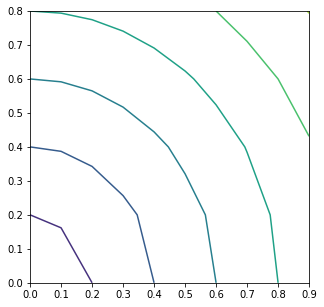

In [60]:
plt.figure(figsize=(5,5))
plt.contour(xx, yy, zz) #contourf 는 fill
plt.show()

### Visualization of SVM

In [67]:
def vis_svc(svc):
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                        np.arange(y_min, y_max, 0.01))
    Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(5,5))
    #plot contour
    plt.contourf(xx,yy,Z,cmap=plt.cm.coolwarm)
    #training points
    plt.scatter(iris.data[:,0], iris.data[:,1],
               c=iris.target,
               cmap=plt.cm.coolwarm)
    
    plt.xlabel('sepal length')
    plt.ylabel('sepal width')

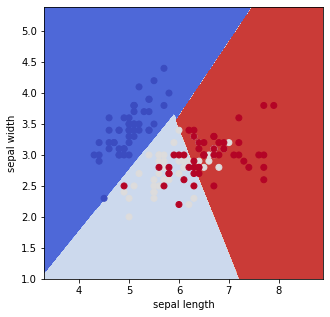

In [68]:
vis_svc(svc_linear)

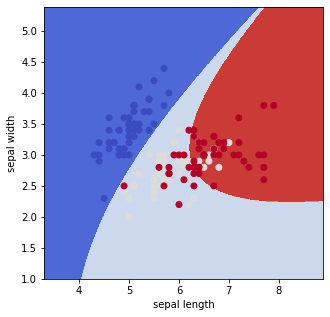

In [69]:
vis_svc(svc_poly)

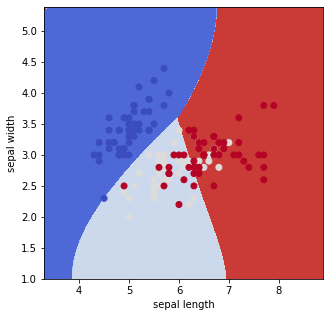

In [70]:
vis_svc(svc_rbf)